<a href="https://colab.research.google.com/github/vishva2410/Fraud_detection-Neural_Networks-/blob/main/Isolation_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df = df.drop('Time',axis=1)
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0


In [6]:
se = StandardScaler()
df['Amount'] = se.fit_transform(df['Amount'].values.reshape(-1,1))
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.219338,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.360231,0.0


In [7]:
df = df.drop('Class',axis=1)
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.219338
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.360231


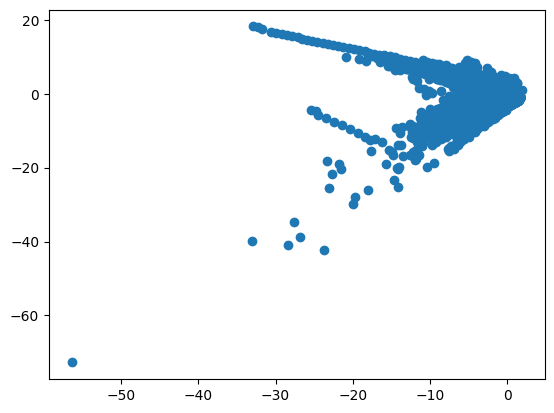

In [9]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

In [10]:
model = IsolationForest(n_estimators=100,contamination=0.01,bootstrap=False,random_state=None)
model.fit(df)

IsolationForest(contamination=0.01)

In [11]:
y_pred = model.predict(df)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [12]:
for i in y_pred:
    if i == -1:
        index = np.where(y_pred == i)

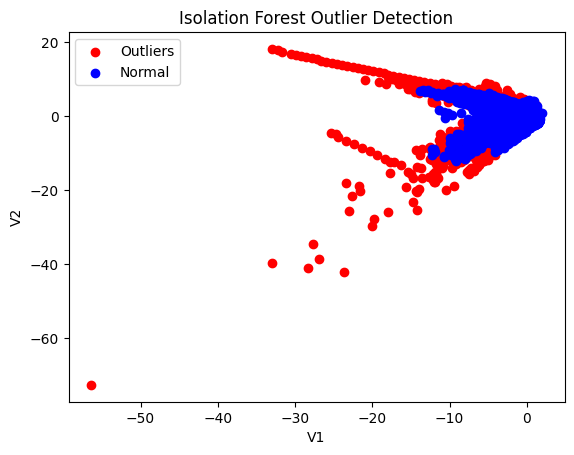

In [16]:
outlier_indices = np.where(y_pred == -1)[0]  # [0] to get the row indices

plt.scatter(df.iloc[outlier_indices, 0], df.iloc[outlier_indices, 1], c='red', label='Outliers')

# Plot the normal data points (optional)
normal_indices = np.where(y_pred == 1)[0]
plt.scatter(df.iloc[normal_indices, 0], df.iloc[normal_indices, 1], c='blue', label='Normal')


plt.xlabel(df.columns[0])  # Set x-axis label
plt.ylabel(df.columns[1])  # Set y-axis label
plt.title("Isolation Forest Outlier Detection")
plt.legend()
plt.show()


In [21]:
anomaly_scores = model.decision_function(df)
print(anomaly_scores)

[0.22983668 0.24286746 0.12713364 ... 0.19756667 0.23463262 0.24691146]


In [24]:

from sklearn.metrics import roc_auc_score, average_precision_score

y_true = np.where(y_pred == -1, 1, 0)

# 1. AUC Score
auc_score = roc_auc_score(y_true, -anomaly_scores)
print(f"AUC Score: {auc_score}")

# 2. Precision at k
k = 100  # Number of top data points to consider
top_k_indices = np.argsort(anomaly_scores)[:k]
precision_at_k = np.mean(y_true[top_k_indices])
print(f"Precision at {k}: {precision_at_k}")

# 3. Average Precision
ap_score = average_precision_score(y_true, -anomaly_scores)
print(f"Average Precision: {ap_score}")

AUC Score: 1.0
Precision at 100: 1.0
Average Precision: 1.0
